In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../..')

In [19]:
import deepmatcher as dm
from utilities_functions.intermediate_layer_extraction import return_layer_input_output,return_layer_input
import torch
import pandas as pd
from tqdm import tqdm

In [7]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.load_state('../../models/hybrid1.pth')
#hybrid_model = hybrid_model.cuda()

In [8]:
attributes = ['Song_Name','Artist_Name','Album_Name','Genre','Price','CopyRight','Time','Released']

In [11]:
neg_classifier_inputs,neg_ids = return_layer_input('../../Structured/itunes-amazon'
                                                                         ,'negatives',128,hybrid_model,
                                                                        hybrid_model.classifier,device=-1)

In [12]:
pos_classifier_inputs,pos_ids = return_layer_input('../../Structured/itunes-amazon/',
                                                                       'positives',128,hybrid_model,
                                                                       hybrid_model.classifier,device=-1)

In [14]:
hybrid_model = hybrid_model.cuda()

In [20]:
from utilities_functions.ri_calculator import find_smallest_variation_to_change
current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri_matrix = []
for batch in neg_classifier_inputs:
    for sample_index in tqdm(range(len(batch))):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=1200,
                                                                                    attribute_length=150,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=1),attributes))
        negatives_ri_matrix.append(current_sample_ris)
        current_sample+=1

  2%|▏         | 2/128 [00:00<00:07, 16.79it/s]

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3


  5%|▌         | 7/128 [00:00<00:06, 17.65it/s]

Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7


  9%|▊         | 11/128 [00:00<00:06, 18.32it/s]

Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11


 10%|█         | 13/128 [00:00<00:06, 18.09it/s]

Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15


 14%|█▍        | 18/128 [00:00<00:05, 18.87it/s]

Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21


 20%|█▉        | 25/128 [00:01<00:04, 20.68it/s]

Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25


 22%|██▏       | 28/128 [00:01<00:04, 21.71it/s]

Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30


 27%|██▋       | 34/128 [00:01<00:04, 21.19it/s]

Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34


 29%|██▉       | 37/128 [00:01<00:04, 19.75it/s]

Processing sample number 35
Processing sample number 36
Processing sample number 37
Processing sample number 38
Processing sample number 39


 34%|███▎      | 43/128 [00:02<00:03, 21.31it/s]

Processing sample number 40
Processing sample number 41
Processing sample number 42
Processing sample number 43
Processing sample number 44


 36%|███▌      | 46/128 [00:02<00:04, 19.87it/s]

Processing sample number 45
Processing sample number 46
Processing sample number 47
Processing sample number 48


 40%|███▉      | 51/128 [00:02<00:04, 17.90it/s]

Processing sample number 49
Processing sample number 50
Processing sample number 51
Processing sample number 52


 44%|████▍     | 56/128 [00:02<00:04, 17.69it/s]

Processing sample number 53
Processing sample number 54
Processing sample number 55
Processing sample number 56


 47%|████▋     | 60/128 [00:02<00:03, 20.54it/s]

Processing sample number 57
Processing sample number 58
Processing sample number 59
Processing sample number 60
Processing sample number 61


 52%|█████▏    | 66/128 [00:03<00:02, 21.14it/s]

Processing sample number 62
Processing sample number 63
Processing sample number 64
Processing sample number 65
Processing sample number 66


 54%|█████▍    | 69/128 [00:03<00:02, 20.59it/s]

Processing sample number 67
Processing sample number 68
Processing sample number 69
Processing sample number 70
Processing sample number 71


 59%|█████▉    | 76/128 [00:03<00:02, 22.93it/s]

Processing sample number 72
Processing sample number 73
Processing sample number 74
Processing sample number 75
Processing sample number 76


 64%|██████▍   | 82/128 [00:03<00:01, 23.89it/s]

Processing sample number 77
Processing sample number 78
Processing sample number 79
Processing sample number 80
Processing sample number 81
Processing sample number 82


 66%|██████▋   | 85/128 [00:04<00:01, 22.20it/s]

Processing sample number 83
Processing sample number 84
Processing sample number 85
Processing sample number 86


 71%|███████   | 91/128 [00:04<00:01, 21.08it/s]

Processing sample number 87
Processing sample number 88
Processing sample number 89
Processing sample number 90
Processing sample number 91


 73%|███████▎  | 94/128 [00:04<00:01, 22.95it/s]

Processing sample number 92
Processing sample number 93
Processing sample number 94
Processing sample number 95
Processing sample number 96


 78%|███████▊  | 100/128 [00:04<00:01, 19.73it/s]

Processing sample number 97
Processing sample number 98
Processing sample number 99
Processing sample number 100


 80%|████████  | 103/128 [00:04<00:01, 19.81it/s]

Processing sample number 101
Processing sample number 102
Processing sample number 103
Processing sample number 104
Processing sample number 105


 85%|████████▌ | 109/128 [00:05<00:01, 18.41it/s]

Processing sample number 106
Processing sample number 107
Processing sample number 108
Processing sample number 109


 87%|████████▋ | 111/128 [00:05<00:00, 18.10it/s]

Processing sample number 110
Processing sample number 111
Processing sample number 112
Processing sample number 113
Processing sample number 114


 92%|█████████▏| 118/128 [00:05<00:00, 19.14it/s]

Processing sample number 115
Processing sample number 116
Processing sample number 117
Processing sample number 118


 96%|█████████▌| 123/128 [00:06<00:00, 20.05it/s]

Processing sample number 119
Processing sample number 120
Processing sample number 121
Processing sample number 122
Processing sample number 123


 98%|█████████▊| 126/128 [00:06<00:00, 18.89it/s]

Processing sample number 124
Processing sample number 125
Processing sample number 126
Processing sample number 127


 13%|█▎        | 3/23 [00:00<00:00, 22.50it/s]

Processing sample number 128
Processing sample number 129
Processing sample number 130
Processing sample number 131
Processing sample number 132


 30%|███       | 7/23 [00:00<00:00, 19.22it/s]

Processing sample number 133
Processing sample number 134
Processing sample number 135
Processing sample number 136


 52%|█████▏    | 12/23 [00:00<00:00, 19.00it/s]

Processing sample number 137
Processing sample number 138
Processing sample number 139
Processing sample number 140
Processing sample number 141


 70%|██████▉   | 16/23 [00:00<00:00, 17.44it/s]

Processing sample number 142
Processing sample number 143
Processing sample number 144
Processing sample number 145


 87%|████████▋ | 20/23 [00:01<00:00, 16.95it/s]

Processing sample number 146
Processing sample number 147
Processing sample number 148
Processing sample number 149


  2%|▏         | 3/128 [00:00<00:05, 23.21it/s]

Processing sample number 150
Processing sample number 151
Processing sample number 152
Processing sample number 153
Processing sample number 154


  5%|▍         | 6/128 [00:00<00:05, 21.94it/s]

Processing sample number 155
Processing sample number 156
Processing sample number 157
Processing sample number 158
Processing sample number 159


  9%|▉         | 12/128 [00:00<00:05, 21.86it/s]

Processing sample number 160
Processing sample number 161
Processing sample number 162
Processing sample number 163


 13%|█▎        | 17/128 [00:00<00:05, 21.34it/s]

Processing sample number 164
Processing sample number 165
Processing sample number 166
Processing sample number 167
Processing sample number 168


 16%|█▌        | 20/128 [00:00<00:05, 20.77it/s]

Processing sample number 169
Processing sample number 170
Processing sample number 171
Processing sample number 172


 20%|█▉        | 25/128 [00:01<00:05, 19.65it/s]

Processing sample number 173
Processing sample number 174
Processing sample number 175
Processing sample number 176
Processing sample number 177


 23%|██▎       | 29/128 [00:01<00:05, 18.60it/s]

Processing sample number 178
Processing sample number 179
Processing sample number 180
Processing sample number 181


 27%|██▋       | 34/128 [00:01<00:05, 17.43it/s]

Processing sample number 182
Processing sample number 183
Processing sample number 184
Processing sample number 185


 30%|███       | 39/128 [00:01<00:04, 17.90it/s]

Processing sample number 186
Processing sample number 187
Processing sample number 188
Processing sample number 189
Processing sample number 190


 34%|███▍      | 44/128 [00:02<00:04, 20.47it/s]

Processing sample number 191
Processing sample number 192
Processing sample number 193
Processing sample number 194
Processing sample number 195


 37%|███▋      | 47/128 [00:02<00:04, 18.80it/s]

Processing sample number 196
Processing sample number 197
Processing sample number 198
Processing sample number 199


 41%|████      | 52/128 [00:02<00:04, 17.93it/s]

Processing sample number 200
Processing sample number 201
Processing sample number 202
Processing sample number 203


 44%|████▍     | 56/128 [00:02<00:04, 16.30it/s]

Processing sample number 204
Processing sample number 205
Processing sample number 206
Processing sample number 207


 47%|████▋     | 60/128 [00:03<00:04, 16.38it/s]

Processing sample number 208
Processing sample number 209
Processing sample number 210
Processing sample number 211


 50%|█████     | 64/128 [00:03<00:04, 15.77it/s]

Processing sample number 212
Processing sample number 213
Processing sample number 214
Processing sample number 215


 53%|█████▎    | 68/128 [00:03<00:03, 16.71it/s]

Processing sample number 216
Processing sample number 217
Processing sample number 218
Processing sample number 219


 57%|█████▋    | 73/128 [00:03<00:03, 17.91it/s]

Processing sample number 220
Processing sample number 221
Processing sample number 222
Processing sample number 223
Processing sample number 224


 60%|██████    | 77/128 [00:04<00:02, 17.56it/s]

Processing sample number 225
Processing sample number 226
Processing sample number 227
Processing sample number 228


 64%|██████▍   | 82/128 [00:04<00:02, 18.52it/s]

Processing sample number 229
Processing sample number 230
Processing sample number 231
Processing sample number 232
Processing sample number 233


 69%|██████▉   | 88/128 [00:04<00:01, 21.89it/s]

Processing sample number 234
Processing sample number 235
Processing sample number 236
Processing sample number 237
Processing sample number 238
Processing sample number 239


 71%|███████   | 91/128 [00:04<00:01, 20.57it/s]

Processing sample number 240
Processing sample number 241
Processing sample number 242
Processing sample number 243


 73%|███████▎  | 94/128 [00:04<00:01, 19.74it/s]

Processing sample number 244
Processing sample number 245
Processing sample number 246
Processing sample number 247


 78%|███████▊  | 100/128 [00:05<00:01, 19.21it/s]

Processing sample number 248
Processing sample number 249
Processing sample number 250
Processing sample number 251


 81%|████████▏ | 104/128 [00:05<00:01, 18.30it/s]

Processing sample number 252
Processing sample number 253
Processing sample number 254
Processing sample number 255


 83%|████████▎ | 106/128 [00:05<00:01, 17.13it/s]

Processing sample number 256
Processing sample number 257
Processing sample number 258
Processing sample number 259


 87%|████████▋ | 111/128 [00:05<00:00, 18.29it/s]

Processing sample number 260
Processing sample number 261
Processing sample number 262
Processing sample number 263


 90%|████████▉ | 115/128 [00:06<00:00, 16.42it/s]

Processing sample number 264
Processing sample number 265
Processing sample number 266
Processing sample number 267


 94%|█████████▍| 120/128 [00:06<00:00, 16.64it/s]

Processing sample number 268
Processing sample number 269
Processing sample number 270
Processing sample number 271


 96%|█████████▌| 123/128 [00:06<00:00, 17.89it/s]

Processing sample number 272
Processing sample number 273
Processing sample number 274
Processing sample number 275
Processing sample number 276


  2%|▏         | 2/128 [00:00<00:06, 18.10it/s]

Processing sample number 277
Processing sample number 278
Processing sample number 279
Processing sample number 280
Processing sample number 281
Processing sample number 282


  5%|▌         | 7/128 [00:00<00:06, 17.36it/s]

Processing sample number 283
Processing sample number 284
Processing sample number 285
Processing sample number 286


  8%|▊         | 10/128 [00:00<00:06, 18.75it/s]

Processing sample number 287
Processing sample number 288
Processing sample number 289
Processing sample number 290


 12%|█▏        | 15/128 [00:00<00:06, 18.75it/s]

Processing sample number 291
Processing sample number 292
Processing sample number 293
Processing sample number 294


 15%|█▍        | 19/128 [00:01<00:06, 16.94it/s]

Processing sample number 295
Processing sample number 296
Processing sample number 297
Processing sample number 298


 18%|█▊        | 23/128 [00:01<00:06, 16.11it/s]

Processing sample number 299
Processing sample number 300
Processing sample number 301
Processing sample number 302


 22%|██▏       | 28/128 [00:01<00:05, 17.96it/s]

Processing sample number 303
Processing sample number 304
Processing sample number 305
Processing sample number 306
Processing sample number 307
Processing sample number 308


 24%|██▍       | 31/128 [00:01<00:04, 19.71it/s]

Processing sample number 309
Processing sample number 310
Processing sample number 311
Processing sample number 312


 29%|██▉       | 37/128 [00:01<00:04, 20.09it/s]

Processing sample number 313
Processing sample number 314
Processing sample number 315
Processing sample number 316
Processing sample number 317


 31%|███▏      | 40/128 [00:02<00:04, 20.17it/s]

Processing sample number 318
Processing sample number 319
Processing sample number 320
Processing sample number 321


 35%|███▌      | 45/128 [00:02<00:04, 18.93it/s]

Processing sample number 322
Processing sample number 323
Processing sample number 324
Processing sample number 325


 38%|███▊      | 49/128 [00:02<00:04, 16.28it/s]

Processing sample number 326
Processing sample number 327
Processing sample number 328


 41%|████▏     | 53/128 [00:02<00:04, 16.70it/s]

Processing sample number 329
Processing sample number 330
Processing sample number 331
Processing sample number 332


 45%|████▌     | 58/128 [00:03<00:03, 17.77it/s]

Processing sample number 333
Processing sample number 334
Processing sample number 335
Processing sample number 336
Processing sample number 337


 49%|████▉     | 63/128 [00:03<00:03, 18.48it/s]

Processing sample number 338
Processing sample number 339
Processing sample number 340
Processing sample number 341
Processing sample number 342


 52%|█████▏    | 66/128 [00:03<00:03, 20.11it/s]

Processing sample number 343
Processing sample number 344
Processing sample number 345
Processing sample number 346
Processing sample number 347


 55%|█████▌    | 71/128 [00:03<00:03, 18.31it/s]

Processing sample number 348
Processing sample number 349
Processing sample number 350
Processing sample number 351


 59%|█████▉    | 76/128 [00:04<00:02, 19.47it/s]

Processing sample number 352
Processing sample number 353
Processing sample number 354
Processing sample number 355


 62%|██████▏   | 79/128 [00:04<00:02, 17.34it/s]

Processing sample number 356
Processing sample number 357
Processing sample number 358
Processing sample number 359


 66%|██████▌   | 84/128 [00:04<00:02, 18.22it/s]

Processing sample number 360
Processing sample number 361
Processing sample number 362
Processing sample number 363


 69%|██████▉   | 88/128 [00:04<00:02, 18.18it/s]

Processing sample number 364
Processing sample number 365
Processing sample number 366
Processing sample number 367


 70%|███████   | 90/128 [00:04<00:02, 16.98it/s]

Processing sample number 368
Processing sample number 369
Processing sample number 370
Processing sample number 371


 75%|███████▌  | 96/128 [00:05<00:01, 20.03it/s]

Processing sample number 372
Processing sample number 373
Processing sample number 374
Processing sample number 375
Processing sample number 376
Processing sample number 377


 80%|███████▉  | 102/128 [00:05<00:01, 20.42it/s]

Processing sample number 378
Processing sample number 379
Processing sample number 380
Processing sample number 381


 82%|████████▏ | 105/128 [00:05<00:01, 19.08it/s]

Processing sample number 382
Processing sample number 383
Processing sample number 384
Processing sample number 385


 86%|████████▌ | 110/128 [00:05<00:00, 19.01it/s]

Processing sample number 386
Processing sample number 387
Processing sample number 388
Processing sample number 389
Processing sample number 390


 91%|█████████ | 116/128 [00:06<00:00, 20.67it/s]

Processing sample number 391
Processing sample number 392
Processing sample number 393
Processing sample number 394
Processing sample number 395
Processing sample number 396


 95%|█████████▌| 122/128 [00:06<00:00, 21.33it/s]

Processing sample number 397
Processing sample number 398
Processing sample number 399
Processing sample number 400
Processing sample number 401


 98%|█████████▊| 125/128 [00:06<00:00, 19.28it/s]

Processing sample number 402
Processing sample number 403
Processing sample number 404
Processing sample number 405


100%|██████████| 128/128 [00:06<00:00, 18.96it/s]

Processing sample number 406


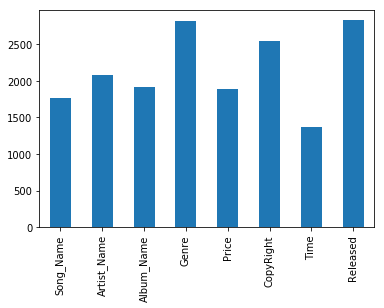

In [22]:
ri_norms_negative_samples = []
for ri_list in negatives_ri_matrix:
    ri_norms_negative_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
neg_variation_df = pd.DataFrame(data= ri_norms_negative_samples,columns=attributes)
neg_variation_df.sum().plot.bar()

In [23]:
current_sample = 0
#each column of this matrix is related to a specific attribute
positives_ri_matrix = []
for batch in pos_classifier_inputs:
    for sample_index in tqdm(range(len(batch))):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=1200,
                                                                                    attribute_length=150,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=0),attributes))
        positives_ri_matrix.append(current_sample_ris)
        current_sample+=1

 25%|██▌       | 1/4 [00:00<00:00,  5.54it/s]

Processing sample number 0
Processing sample number 1


  0%|          | 0/128 [00:00<?, ?it/s]

Processing sample number 2
Processing sample number 3
Processing sample number 4


  2%|▏         | 2/128 [00:00<00:18,  6.71it/s]

Processing sample number 5
Processing sample number 6
Processing sample number 7


  5%|▌         | 7/128 [00:00<00:11, 10.51it/s]

Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12


  9%|▊         | 11/128 [00:00<00:10, 11.16it/s]

Processing sample number 13
Processing sample number 14
Processing sample number 15


 10%|█         | 13/128 [00:01<00:10, 10.49it/s]

Processing sample number 16
Processing sample number 17
Processing sample number 18


 12%|█▏        | 15/128 [00:01<00:10, 10.94it/s]

Processing sample number 19
Processing sample number 20


 15%|█▍        | 19/128 [00:01<00:10, 10.70it/s]

Processing sample number 21
Processing sample number 22
Processing sample number 23


 16%|█▋        | 21/128 [00:01<00:11,  9.37it/s]

Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27


 21%|██        | 27/128 [00:02<00:07, 12.75it/s]

Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31


 23%|██▎       | 29/128 [00:02<00:08, 12.14it/s]

Processing sample number 32
Processing sample number 33
Processing sample number 34


 24%|██▍       | 31/128 [00:02<00:08, 11.36it/s]

Processing sample number 35
Processing sample number 36


 27%|██▋       | 35/128 [00:02<00:08, 11.04it/s]

Processing sample number 37
Processing sample number 38
Processing sample number 39


 29%|██▉       | 37/128 [00:03<00:10,  9.09it/s]

Processing sample number 40
Processing sample number 41


 30%|███       | 39/128 [00:03<00:09,  9.68it/s]

Processing sample number 42
Processing sample number 43
Processing sample number 44


 34%|███▎      | 43/128 [00:03<00:07, 10.65it/s]

Processing sample number 45
Processing sample number 46
Processing sample number 47
Processing sample number 48


 36%|███▌      | 46/128 [00:04<00:07, 11.51it/s]

Processing sample number 49
Processing sample number 50


 38%|███▊      | 48/128 [00:04<00:06, 11.45it/s]

Processing sample number 51
Processing sample number 52
Processing sample number 53


 41%|████      | 52/128 [00:04<00:06, 11.36it/s]

Processing sample number 54
Processing sample number 55
Processing sample number 56


 45%|████▍     | 57/128 [00:04<00:05, 14.02it/s]

Processing sample number 57
Processing sample number 58
Processing sample number 59
Processing sample number 60
Processing sample number 61


 48%|████▊     | 61/128 [00:05<00:04, 14.71it/s]

Processing sample number 62
Processing sample number 63
Processing sample number 64
Processing sample number 65


 51%|█████     | 65/128 [00:05<00:04, 14.73it/s]

Processing sample number 66
Processing sample number 67
Processing sample number 68
Processing sample number 69


 52%|█████▏    | 67/128 [00:05<00:04, 14.45it/s]

Processing sample number 70
Processing sample number 71
Processing sample number 72


 55%|█████▌    | 71/128 [00:05<00:04, 14.20it/s]

Processing sample number 73
Processing sample number 74
Processing sample number 75


 59%|█████▉    | 76/128 [00:06<00:03, 15.56it/s]

Processing sample number 76
Processing sample number 77
Processing sample number 78
Processing sample number 79
Processing sample number 80


 61%|██████    | 78/128 [00:06<00:03, 15.59it/s]

Processing sample number 81
Processing sample number 82
Processing sample number 83


 64%|██████▍   | 82/128 [00:06<00:03, 13.37it/s]

Processing sample number 84
Processing sample number 85
Processing sample number 86


 67%|██████▋   | 86/128 [00:06<00:02, 14.59it/s]

Processing sample number 87
Processing sample number 88
Processing sample number 89
Processing sample number 90
Processing sample number 91


 71%|███████   | 91/128 [00:07<00:02, 15.76it/s]

Processing sample number 92
Processing sample number 93
Processing sample number 94
Processing sample number 95


 73%|███████▎  | 94/128 [00:07<00:02, 15.87it/s]

Processing sample number 96
Processing sample number 97
Processing sample number 98
Processing sample number 99


 75%|███████▌  | 96/128 [00:07<00:01, 16.54it/s]

Processing sample number 100
Processing sample number 101


 77%|███████▋  | 98/128 [00:07<00:02, 12.39it/s]

Processing sample number 102
Processing sample number 103


 78%|███████▊  | 100/128 [00:07<00:02, 11.50it/s]

Processing sample number 104
Processing sample number 105


 80%|███████▉  | 102/128 [00:08<00:02, 10.19it/s]

Processing sample number 106
Processing sample number 107


 83%|████████▎ | 106/128 [00:08<00:01, 11.11it/s]

Processing sample number 108
Processing sample number 109
Processing sample number 110


 84%|████████▍ | 108/128 [00:08<00:01, 12.10it/s]

Processing sample number 111
Processing sample number 112
Processing sample number 113


 88%|████████▊ | 112/128 [00:08<00:01, 10.92it/s]

Processing sample number 114
Processing sample number 115
Processing sample number 116
Processing sample number 117


 91%|█████████ | 116/128 [00:09<00:00, 12.86it/s]

Processing sample number 118
Processing sample number 119
Processing sample number 120


 94%|█████████▍| 120/128 [00:09<00:00, 13.08it/s]

Processing sample number 121
Processing sample number 122
Processing sample number 123
Processing sample number 124
Processing sample number 125


 97%|█████████▋| 124/128 [00:09<00:00, 11.46it/s]

Processing sample number 126
Processing sample number 127
Processing sample number 128


 98%|█████████▊| 126/128 [00:10<00:00, 11.07it/s]

Processing sample number 129
Processing sample number 130
Processing sample number 131


100%|██████████| 128/128 [00:10<00:00, 12.26it/s]


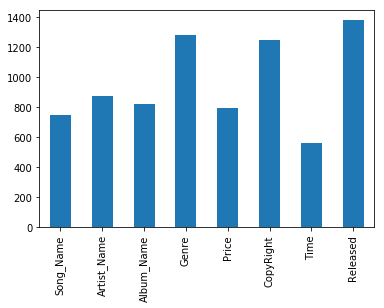

In [24]:
ri_norms_pos = []
for ri_list in positives_ri_matrix:
    ri_norms_pos.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
pos_variation_df = pd.DataFrame(data= ri_norms_pos,columns=attributes)
pos_variation_df.sum().plot.bar()

## Calculate closest vector of non perturbed samples and closer vector of perturbed samples

### Positives analysis

In [99]:
from utilities_functions.distance_measures import nearest_neighbour,nearest_neighbour_onAttribute

In [100]:
negativesCloserToPositives = []
for batch in pos_classifier_inputs:
    for sample in tqdm(batch):
        distance = nearest_neighbour(sample,neg_classifier_inputs,'euclidean')
        negativesCloserToPositives.append(distance)



  0%|          | 0/4 [00:00<?, ?it/s]

 50%|█████     | 2/4 [00:00<00:00, 12.43it/s]

100%|██████████| 4/4 [00:00<00:00, 12.75it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  2%|▏         | 2/128 [00:00<00:09, 13.93it/s]

  3%|▎         | 4/128 [00:00<00:08, 14.48it/s]

  5%|▍         | 6/128 [00:00<00:08, 14.89it/s]

  6%|▋         | 8/128 [00:00<00:07, 15.18it/s]

  8%|▊         | 10/128 [00:00<00:07, 15.43it/s]

  9%|▉         | 12/128 [00:00<00:08, 14.37it/s]

 11%|█         | 14/128 [00:00<00:07, 14.35it/s]

 12%|█▎        | 16/128 [00:01<00:07, 14.27it/s]

 14%|█▍        | 18/128 [00:01<00:07, 14.24it/s]

 16%|█▌        | 20/128 [00:01<00:07, 14.46it/s]

 17%|█▋        | 22/128 [00:01<00:07, 14.84it/s]

 19%|█▉        | 24/128 [00:01<00:06, 15.10it/s]

 20%|██        | 26/128 [00:01<00:06, 15.32it/s]

 22%|██▏       | 28/128 [00:01<00:06, 15.50it/s]

 23%|██▎       | 30/128 [00:01<00:06, 15.62it/s]

 25%|██▌       | 32/128 [00:02<00:06, 15.71it/s]

 27%|██▋       | 34/128 [00:

In [101]:
negativesCloserToPositives[0:10]

[6.02672815322876,
 4.381704330444336,
 3.7388572692871094,
 3.8539187908172607,
 6.009554862976074,
 6.598804473876953,
 3.4424588680267334,
 4.3242692947387695,
 4.20885705947876,
 3.8723092079162598]

In [102]:
from scipy.spatial.distance import euclidean
# per ogni attributo trovo il più vicino
negativesCloserToPerturbedPositives = []
i = 0
for batch in pos_classifier_inputs:
    for sample in tqdm(batch):
        currentSamplePerturbedDistance = []
        for j in range(len(attributes)):
            start_index= j*150
            end_index = start_index+150
            dist = euclidean(sample.data[start_index:end_index],(sample+positives_ri_matrix[i][j]).data[start_index:end_index])
            currentSamplePerturbedDistance.append(dist)
        negativesCloserToPerturbedPositives.append(currentSamplePerturbedDistance)
        i+=1



  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 408.85it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

 48%|████▊     | 62/128 [00:00<00:00, 613.35it/s]

100%|██████████| 128/128 [00:00<00:00, 626.07it/s]

In [121]:
perturbedPosClosest = list(map(lambda distances:max(distances),negativesCloserToPerturbedPositives))

In [122]:
negativesCloserToPositives = np.array(negativesCloserToPositives)
perturbedPosClosest = np.array(perturbedPosClosest)

In [123]:
differences = (perturbedPosClosest-negativesCloserToPositives)

In [124]:
np.sum(differences >= 0, axis=0)

118

### Negatives analysis

In [110]:
positivesCloserToNegatives = []
for batch in neg_classifier_inputs:
    for sample in tqdm(batch):
        distance = nearest_neighbour(sample,pos_classifier_inputs,'euclidean')
        positivesCloserToNegatives.append(distance)



  0%|          | 0/128 [00:00<?, ?it/s]

  3%|▎         | 4/128 [00:00<00:03, 39.62it/s]

  7%|▋         | 9/128 [00:00<00:02, 42.21it/s]

 12%|█▏        | 15/128 [00:00<00:02, 44.44it/s]

 15%|█▍        | 19/128 [00:00<00:02, 41.70it/s]

 18%|█▊        | 23/128 [00:00<00:02, 40.71it/s]

 22%|██▏       | 28/128 [00:00<00:02, 42.92it/s]

 26%|██▌       | 33/128 [00:00<00:02, 44.20it/s]

 30%|██▉       | 38/128 [00:00<00:01, 45.57it/s]

 34%|███▎      | 43/128 [00:00<00:01, 46.60it/s]

 38%|███▊      | 48/128 [00:01<00:01, 47.35it/s]

 41%|████▏     | 53/128 [00:01<00:01, 47.91it/s]

 45%|████▌     | 58/128 [00:01<00:01, 48.27it/s]

 49%|████▉     | 63/128 [00:01<00:01, 48.51it/s]

 53%|█████▎    | 68/128 [00:01<00:01, 48.57it/s]

 57%|█████▋    | 73/128 [00:01<00:01, 48.60it/s]

 61%|██████    | 78/128 [00:01<00:01, 48.57it/s]

 65%|██████▍   | 83/128 [00:01<00:00, 48.56it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 48.56it/s]

 73%|███████▎  | 93/128 [00:01<00:00, 48.60it/s]

 77%|████

In [111]:
from scipy.spatial.distance import euclidean
# per ogni attributo trovo il più vicino
positivesCloserToPerturbedNegatives = []
i = 0
for batch in neg_classifier_inputs:
    for sample in tqdm(batch):
        currentSamplePerturbedDistance = []
        for j in range(len(attributes)):
            start_index= j*150
            end_index = start_index+150
            dist = euclidean(sample.data[start_index:end_index],(sample+negatives_ri_matrix[i][j]).data[start_index:end_index])
            currentSamplePerturbedDistance.append(dist)
        positivesCloserToPerturbedNegatives.append(currentSamplePerturbedDistance)
        i+=1



  0%|          | 0/128 [00:00<?, ?it/s]

 48%|████▊     | 61/128 [00:00<00:00, 607.94it/s]

100%|██████████| 128/128 [00:00<00:00, 671.55it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

100%|██████████| 23/23 [00:00<00:00, 747.36it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

 61%|██████    | 78/128 [00:00<00:00, 778.80it/s]

100%|██████████| 128/128 [00:00<00:00, 748.81it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

 62%|██████▏   | 79/128 [00:00<00:00, 784.71it/s]

100%|██████████| 128/128 [00:00<00:00, 774.35it/s]

In [126]:
perturbedNegClosest = list(map(lambda distances:max(distances),positivesCloserToPerturbedNegatives))

In [127]:
positivesCloserToNegatives = np.array(positivesCloserToNegatives)
perturbedNegClosest = np.array(perturbedNegClosest)
negDifferences = perturbedNegClosest-positivesCloserToNegatives
np.sum(negDifferences >0 ,axis=0)

369